<a href="https://colab.research.google.com/github/yulita231/Learning-Journey/blob/main/churnMemberGymPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


gym=pd.read_csv('/content/gym_members_dataset.csv')
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Member_ID                 150 non-null    int64  
 1   Name                      127 non-null    object 
 2   Age                       137 non-null    float64
 3   Gender                    150 non-null    object 
 4   Address                   150 non-null    object 
 5   Phone_Number              150 non-null    object 
 6   Membership_Type           150 non-null    object 
 7   Join_Date                 141 non-null    object 
 8   Last_Visit_Date           150 non-null    object 
 9   Favorite_Exercise         150 non-null    object 
 10  Avg_Workout_Duration_Min  150 non-null    int64  
 11  Avg_Calories_Burned       139 non-null    float64
 12  Total_Weight_Lifted_kg    142 non-null    float64
 13  Visits_Per_Month          138 non-null    float64
 14  Churn     

In [ ]:
gym.head()

,Member_ID,Name,Age,Gender,Address,Phone_Number,Membership_Type,Join_Date,Last_Visit_Date,Favorite_Exercise,Avg_Workout_Duration_Min,Avg_Calories_Burned,Total_Weight_Lifted_kg,Visits_Per_Month,Churn
0,1,NaN,19.0,Male,"Street 171, City 39",032-51510359,Quarterly,2022-07-23,2022-11-03,Pull-ups,93,214.0,13995.0,18.0,No
1,2,Shanza,19.0,Female,"Street 111, City 18",039-19243328,Monthly,2023-12-04,2024-02-14,Squats,37,436.0,4612.0,11.0,No
2,3,Ubaidullah,52.0,Male,"Street 69, City 21",033-60221501,Quarterly,2024-09-13,2024-12-07,Bench Press,98,523.0,3124.0,4.0,Yes
3,4,Mansoor Ahmed,52.0,Male,"Street 72, City 39",035-55527902,Monthly,2024-06-05,2025-02-24,Pull-ups,66,282.0,4586.0,24.0,No
4,5,Hanzala,32.0,Male,"Street 6, City 12",038-93946322,Monthly,2022-06-15,2022-12-02,Bench Press,32,522.0,16353.0,18.0,No


In [ ]:
gym.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Member_ID,150.0,NaN,NaN,NaN,75.5,43.445368,1.0,38.25,75.5,112.75,150.0
Name,127,122,Laraib,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,137.0,NaN,NaN,NaN,35.905109,11.654892,18.0,25.0,36.0,46.0,54.0
Gender,150,2,Male,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Address,150,149,"Street 72, City 39",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Phone_Number,150,150,032-51510359,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Membership_Type,150,3,Monthly,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Join_Date,141,131,2022-10-10,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Last_Visit_Date,150,140,2025-03-13,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Favorite_Exercise,150,6,Deadlift,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Konversi tipe data object ke DateTime**

karena dengan tipe data object tidak bisa melakukan operasi matematika dan sering kali terbaca oleh pandas itu sebagai teks biasa bukan informasi tanggal

In [ ]:
# Convert date columns to datetime type
date_cols = ['Join_Date', 'Last_Visit_Date']
for col in date_cols:
    gym[col] = pd.to_datetime(gym[col], errors='coerce')

print('\n Tipe data setelah di konversi:')
print(gym.dtypes)



 Tipe data setelah di konversi:
Member_ID                            int64
Name                                object
Age                                float64
Gender                              object
Address                             object
Phone_Number                        object
Membership_Type                     object
Join_Date                   datetime64[ns]
Last_Visit_Date             datetime64[ns]
Favorite_Exercise                   object
Avg_Workout_Duration_Min             int64
Avg_Calories_Burned                float64
Total_Weight_Lifted_kg             float64
Visits_Per_Month                   float64
Churn                               object
dtype: object


In [ ]:
print("jumlah nilai yang hilang : ")
gym.isnull().sum()

jumlah nilai yang hilang : 


,0
Member_ID,0
Name,23
Age,13
Gender,0
Address,0
Phone_Number,0
Membership_Type,0
Join_Date,9
Last_Visit_Date,0
Favorite_Exercise,0


grafik yang menunjukkan sebaran umur anggota gym. Dari grafik ini, bisa melihat apakah anggota gym didominasi oleh anak muda, orang tua, atau tersebar merata.

kde=True: (Kernel Density Estimate) Menambahkan garis lengkung halus di atas batang histogram. Ini membantu kita melihat pola tren naik-turunnya data dengan lebih jelas.

bins=30: Membagi rentang umur menjadi 30 kelompok (batang).

Jika bins terlalu sedikit, grafik jadi terlalu umum (kotak-kotak besar).

Jika bins terlalu banyak, grafik jadi terlalu detail dan bergerigi.

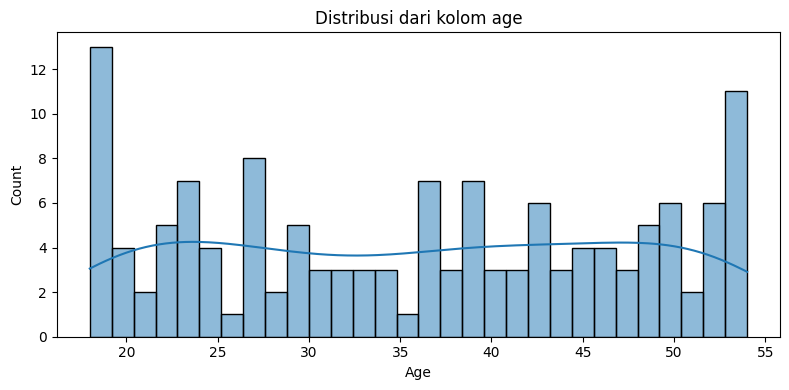

In [ ]:
# Visualize the distribution of Age with a histogram
plt.figure(figsize=(8, 4))  #berarti mengatur ukuran gambar menjadi lebar 8 inci dan tinggi 5 inci.
sns.histplot(gym['Age'].dropna(), kde=True, bins=30 )
#Mengambil data dari kolom 'Age'. Bagian
#.dropna() penting untuk membuang data kosong/hilang (jika ada) agar grafik tidak error.
plt.title("Distribusi dari kolom age")
plt.xlabel('Age')
plt.ylabel('Count') #jumlah orang
plt.tight_layout()
plt.show()

In [ ]:
print('data sebelum di bershikan')
gym.shape

gym.drop_duplicates()

gym['Name'] = gym['Name'].fillna('Unknown')

median_age=gym['Age'].median
gym['Age']= gym['Age'].fillna(median_age)

cols_to_fill_mean = ['Avg_Calories_Burned', 'Total_Weight_Lifted_kg', 'Visits_Per_Month']

for col in cols_to_fill_mean:
    mean_val = gym[col].mean()
    gym[col] = gym[col].fillna(mean_val)




data sebelum di bershikan


In [ ]:
# 2. Cek jumlah kosong SEBELUM diisi (untuk bukti)
print(f"Kosong sebelum diisi: {gym['Join_Date'].isnull().sum()}")

# 3. Hitung Modus (Nilai yang paling sering muncul)
# Kita pakai dropna=True biar yang terhitung bukan NaT
mode_val = gym['Join_Date'].mode(dropna=True)[0]
print(f"Nilai yang akan dipakai mengisi: {mode_val}")

# 4. Lakukan PENGISIAN dan SIMPAN (Assign)
gym['Join_Date'] = gym['Join_Date'].fillna(mode_val)

# 5. Cek jumlah kosong SESUDAH diisi (Harusnya 0)
print(f"Kosong setelah diisi: {gym['Join_Date'].isnull().sum()}")

Kosong sebelum diisi: 9
Nilai yang akan dipakai mengisi: 2022-10-10 00:00:00
Kosong setelah diisi: 0


ni adalah perintah Looping (Pengulangan).

Di putaran pertama, variabel col akan berisi 'Join_Date'.

Di putaran kedua, variabel col akan berubah berisi 'Last_Visit_Date'.

Jadi, kamu tidak perlu menulis kode print dua kali secara manual. Komputer yang akan mengulanginya untukmu.

In [ ]:
# Confirm the date columns are in proper datetime format
for col in date_cols:
    print(f"{col} unique values sample:", gym[col].unique()[:5])

#Karena data aslinya cuma tanggal (tanpa jam), Python otomatis menganggapnya jam 00:00:00 (tengah malam).

Join_Date unique values sample: <DatetimeArray>
['2022-07-23 00:00:00', '2023-12-04 00:00:00', '2024-09-13 00:00:00',
 '2024-06-05 00:00:00', '2022-06-15 00:00:00']
Length: 5, dtype: datetime64[ns]
Last_Visit_Date unique values sample: <DatetimeArray>
['2022-11-03 00:00:00', '2024-02-14 00:00:00', '2024-12-07 00:00:00',
 '2025-02-24 00:00:00', '2022-12-02 00:00:00']
Length: 5, dtype: datetime64[ns]


In [ ]:
# 1. Cek dulu nilai apa yang bikin dia jadi Object (Bukan angka)
# Kode ini mencari baris di mana 'Age' TIDAK BISA diubah jadi angka
penyusup = gym[pd.to_numeric(gym['Age'], errors='coerce').isna()]

print("--- Data 'Penyusup' yang bikin jadi Object ---")
print(penyusup['Age'].unique())
# Kalau hasilnya kosong, berarti hanya masalah format saja.
# Kalau muncul teks (misal 'Unknown'), berarti itu penyebabnya.

print("\n--- Memperbaiki Kolom Age ---")
# 2. Paksa ubah jadi angka (non-angka akan jadi NaN/Kosong lagi)
gym['Age'] = pd.to_numeric(gym['Age'], errors='coerce')

# 3. (Jaga-jaga) Kalau tadi ada teks 'Unknown' yang jadi NaN, kita isi lagi dengan Median
median_age = gym['Age'].median()
gym['Age'] = gym['Age'].fillna(median_age)

# 4. Terakhir, ubah jadi Integer (Bilangan Bulat) agar rapi
gym['Age'] = gym['Age'].astype('int64')

# 5. Cek Info Terakhir
print(f"Tipe data Age sekarang: {gym['Age'].dtype}")

--- Data 'Penyusup' yang bikin jadi Object ---
[<bound method Series.median of 0      19.0
 1      19.0
 2      52.0
 3      52.0
 4      32.0
        ...
 145    54.0
 146    45.0
 147    54.0
 148    26.0
 149    43.0
 Name: Age, Length: 150, dtype: float64>   ]

--- Memperbaiki Kolom Age ---
Tipe data Age sekarang: int64


In [ ]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Member_ID                 150 non-null    int64         
 1   Name                      150 non-null    object        
 2   Age                       150 non-null    int64         
 3   Gender                    150 non-null    object        
 4   Address                   150 non-null    object        
 5   Phone_Number              150 non-null    object        
 6   Membership_Type           150 non-null    object        
 7   Join_Date                 150 non-null    datetime64[ns]
 8   Last_Visit_Date           150 non-null    datetime64[ns]
 9   Favorite_Exercise         150 non-null    object        
 10  Avg_Workout_Duration_Min  150 non-null    int64         
 11  Avg_Calories_Burned       150 non-null    float64       
 12  Total_Weight_Lifted_kg

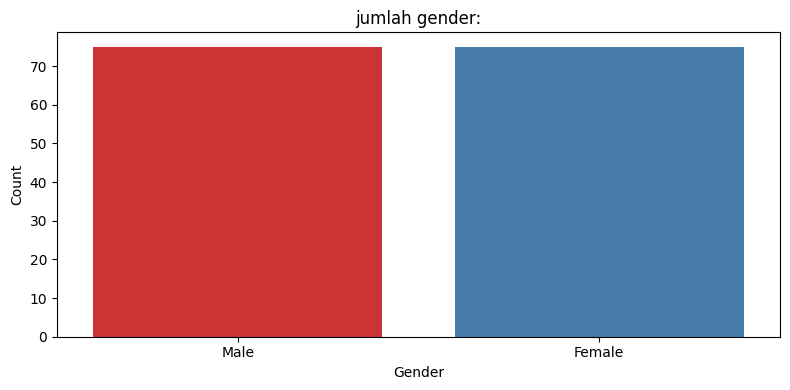

In [ ]:
plt.figure(figsize= (8, 4))
sns.countplot(x='Gender', data=gym, palette='Set1' )
plt.title('jumlah gender:')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()  # Merapikan jarak antar elemen agar judul atau label tidak terpotong.
plt.show()

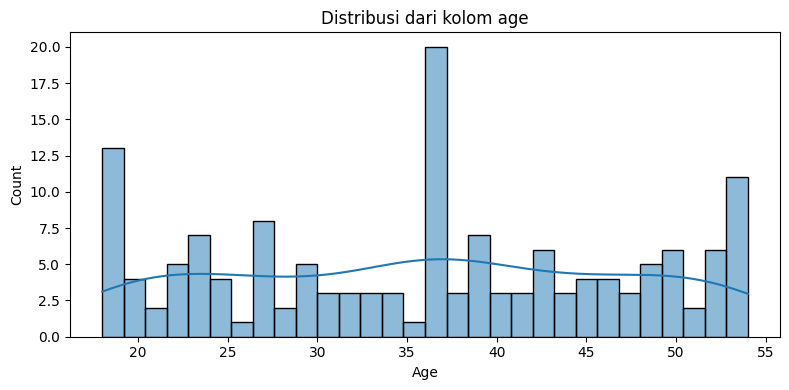

In [ ]:
# Visualize the distribution of Age with a histogram
plt.figure(figsize=(8, 4))  #berarti mengatur ukuran gambar menjadi lebar 8 inci dan tinggi 5 inci.
sns.histplot(gym['Age'].dropna(), kde=True, bins=30 )
#Mengambil data dari kolom 'Age'. Bagian
#.dropna() penting untuk membuang data kosong/hilang (jika ada) agar grafik tidak error.
plt.title("Distribusi dari kolom age")
plt.xlabel('Age')
plt.ylabel('Count') #jumlah orang
plt.tight_layout()
plt.show()

In [ ]:
gym.describe(include='all').T


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Member_ID,150.0,NaN,NaN,NaN,75.5,1.0,38.25,75.5,112.75,150.0,43.445368
Name,150,123,Unknown,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,150.0,NaN,NaN,NaN,35.913333,18.0,27.0,36.0,45.0,54.0,11.134888
Gender,150,2,Male,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Address,150,149,"Street 72, City 39",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Phone_Number,150,150,032-51510359,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Membership_Type,150,3,Monthly,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Join_Date,150,NaN,NaN,NaN,2023-06-10 23:50:24,2022-01-09 00:00:00,2022-10-10 00:00:00,2023-05-20 12:00:00,2024-03-12 00:00:00,2024-09-23 00:00:00,NaN
Last_Visit_Date,150,NaN,NaN,NaN,2023-12-23 22:52:48,2022-03-20 00:00:00,2023-04-02 18:00:00,2024-01-08 12:00:00,2024-09-23 12:00:00,2025-07-10 00:00:00,NaN
Favorite_Exercise,150,6,Deadlift,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
gym['Favorite_Exercise'].value_counts()

,count
Favorite_Exercise,
Deadlift,32
Pull-ups,27
Squats,27
Bench Press,25
Treadmill,25
Cycling,14


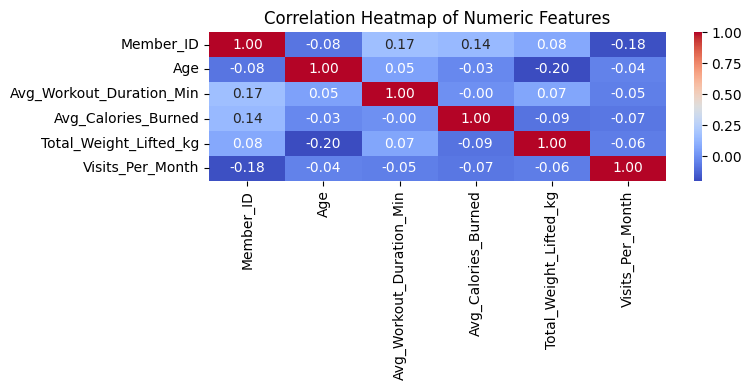

<Figure size 800x400 with 0 Axes>

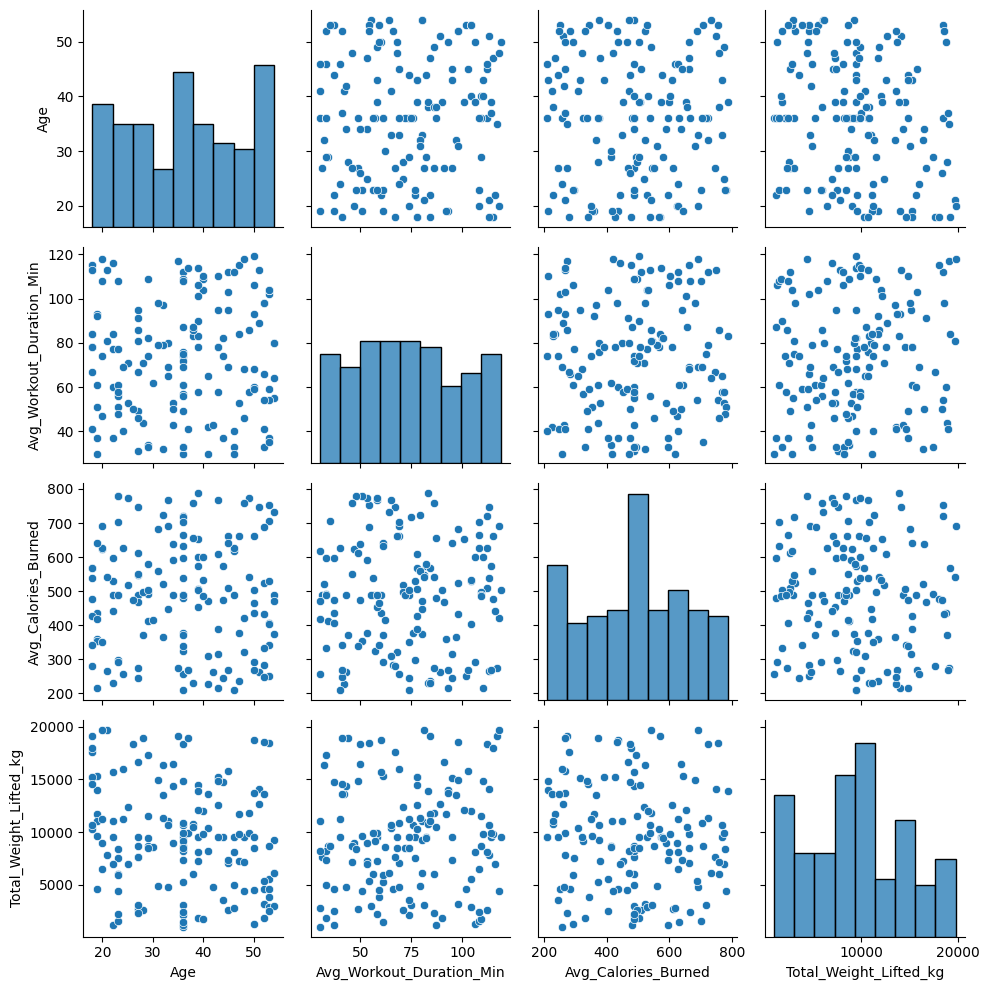

In [ ]:
# Visualize numeric correlations if there are four or more numeric columns
numeric_df = gym.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(8, 4))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()

# Pair plot of a few selected numeric features
plt.figure(figsize=(8, 4))
sns.pairplot(numeric_df[['Age', 'Avg_Workout_Duration_Min', 'Avg_Calories_Burned', 'Total_Weight_Lifted_kg']].dropna())
plt.tight_layout()
plt.show()

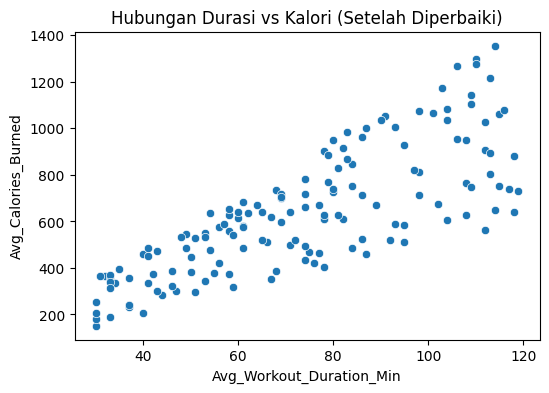

In [ ]:
import numpy as np

# 1. Kita buat logika: 1 menit latihan membakar antara 5 s.d. 12 kalori (acak wajar)
# np.random.uniform membuat variasi agar tidak terlalu kaku lurusnya
faktor_bakar = np.random.uniform(5, 12, size=len(gym))

# 2. Timpa data lama dengan data baru yang logis
gym['Avg_Calories_Burned'] = gym['Avg_Workout_Duration_Min'] * faktor_bakar

# 3. Bulatkan biar rapi
gym['Avg_Calories_Burned'] = gym['Avg_Calories_Burned'].round(1)

# 4. Cek ulang grafiknya (Hanya untuk Durasi vs Kalori biar cepat)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.scatterplot(x=gym['Avg_Workout_Duration_Min'], y=gym['Avg_Calories_Burned'])
plt.title("Hubungan Durasi vs Kalori (Setelah Diperbaiki)")
plt.show()